In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


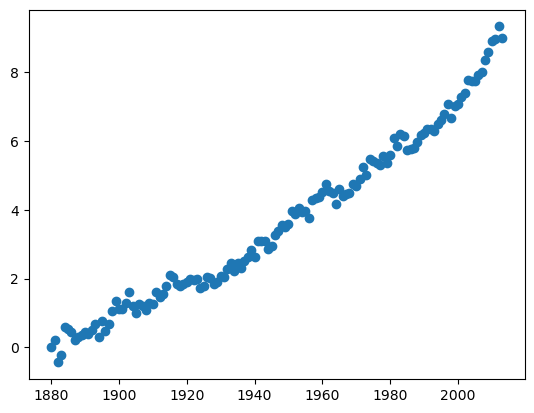

In [12]:
x_axis = df['Year']
y_axis = df['CSIRO Adjusted Sea Level']
plt.scatter(x_axis, y_axis)
plt.show()

In [13]:
res = linregress(x_axis, y_axis)

In [14]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.969747


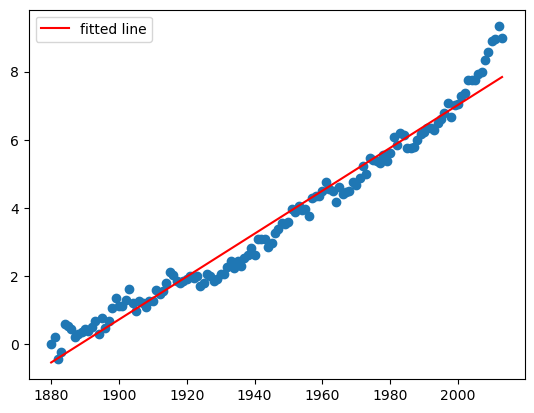

In [17]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, res.intercept + res.slope*x_axis, 'r', label='fitted line')
plt.legend()
plt.show()

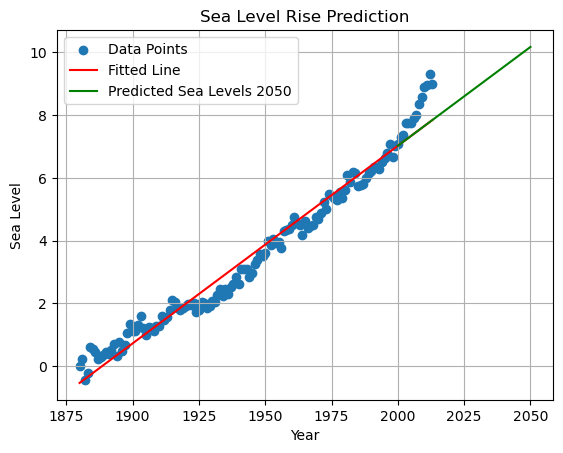

In [20]:
# Calculate predicted sea levels for the years 2000 to 2050
future_years = np.arange(2000, 2051)  # Years from 2000 to 2050
predicted_sea_levels = res.intercept + res.slope * future_years

# Plot the scatter plot and the fitted line
plt.scatter(x_axis, y_axis, label='Data Points')
plt.plot(x_axis, res.intercept + res.slope * x_axis, 'r', label='Fitted Line')
plt.plot(future_years, predicted_sea_levels, 'g', label='Predicted Sea Levels 2050')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Sea Level Rise Prediction')
plt.legend()
plt.grid(True)
plt.show()

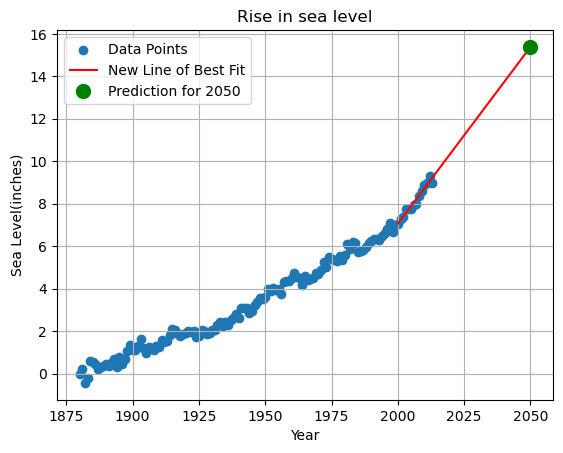

In [23]:
# Filter data from year 2000 to the most recent year
start_year = 2000
recent_year = x_axis.max()
recent_years_mask = (x_axis >= start_year) & (x_axis <= recent_year)
recent_x = x_axis[recent_years_mask]
recent_y = y_axis[recent_years_mask]

# Perform linear regression using recent data
res_recent = linregress(recent_x, recent_y)

# Calculate predicted sea level for the year 2050 based on the recent linear regression
year_2050 = 2050
predicted_sea_level_2050_recent = res_recent.intercept + res_recent.slope * year_2050

# Create a function for the new line of best fit
def predict_sea_level_recent(year):
    return res_recent.intercept + res_recent.slope * year

# Extend the line to the year 2050 for plotting
future_years = np.arange(2000, 2051)  # Years from 2000 to 2050
predicted_sea_levels_recent = predict_sea_level_recent(future_years)

# Plot the scatter plot, the new line of best fit, and the prediction for 2050
plt.scatter(x_axis, y_axis, label='Data Points')
plt.plot(future_years, predicted_sea_levels_recent, 'r', label='New Line of Best Fit')
plt.plot(year_2050, predicted_sea_level_2050_recent, 'go', markersize=10, label='Prediction for 2050')
plt.xlabel('Year')
plt.ylabel('Sea Level(inches)')
plt.title('Rise in sea level')
plt.legend()
plt.grid(True)
plt.show()

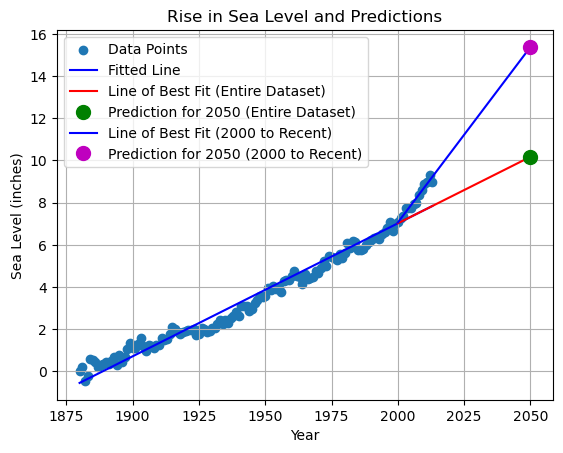

In [33]:
# Calculate predicted sea level for the year 2050 based on the entire dataset linear regression
year_2050 = 2050
predicted_sea_level_2050 = res.intercept + res.slope * year_2050

# Create a function for the entire dataset line of best fit
def predict_sea_level(year):
    return res.intercept + res.slope * year

# Extend the line to the year 2050 for plotting (entire dataset)
future_years = np.arange(2000, 2051)  # Years from 2000 to 2050
predicted_sea_levels = predict_sea_level(future_years)

# Filter data from year 2000 to the most recent year
start_year = 2000
recent_year = x_axis.max()
recent_years_mask = (x_axis >= start_year) & (x_axis <= recent_year)
recent_x = x_axis[recent_years_mask]
recent_y = y_axis[recent_years_mask]

# Perform linear regression using recent data
res_recent = linregress(recent_x, recent_y)

# Calculate predicted sea level for the year 2050 based on recent linear regression
predicted_sea_level_2050_recent = res_recent.intercept + res_recent.slope * year_2050

# Create a function for the new line of best fit (recent data)
def predict_sea_level_recent(year):
    return res_recent.intercept + res_recent.slope * year

# Extend the line to the year 2050 for plotting (recent data)
predicted_sea_levels_recent = predict_sea_level_recent(future_years)

# Plot the scatter plot, both lines of best fit, and the predictions for 2050
plt.scatter(x_axis, y_axis, label='Data Points')
plt.plot(x_axis, res.intercept + res.slope * x_axis, 'b', label='Fitted Line')
plt.plot(future_years, predicted_sea_levels, 'r', label='Line of Best Fit (Entire Dataset)')
plt.plot(year_2050, predicted_sea_level_2050, 'go', markersize=10, label='Prediction for 2050 (Entire Dataset)')
plt.plot(future_years, predicted_sea_levels_recent, 'b', label='Line of Best Fit (2000 to Recent)')
plt.plot(year_2050, predicted_sea_level_2050_recent, 'mo', markersize=10, label='Prediction for 2050 (2000 to Recent)')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level and Predictions')
plt.legend()
plt.grid(True)
plt.show()